In [205]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

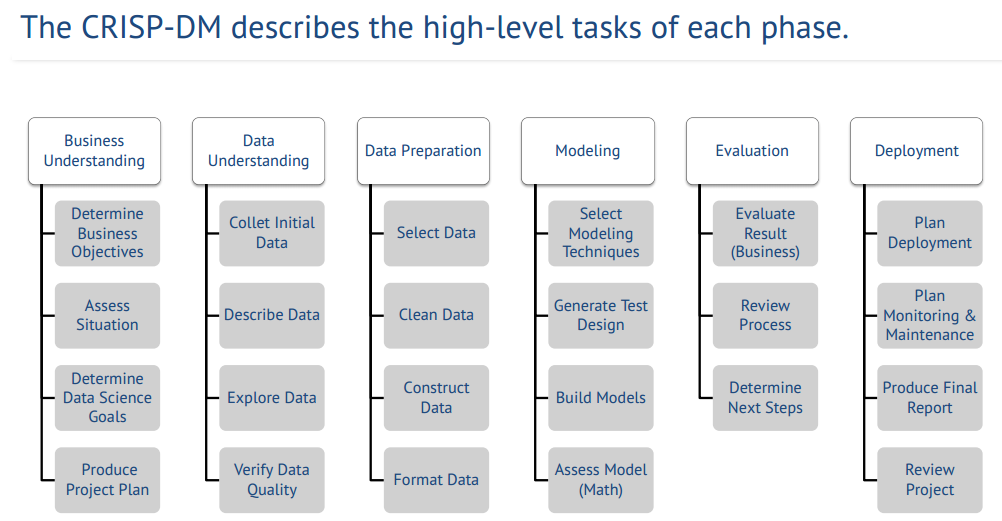

# Explorative Data Analysis


In [206]:
df_analyse = pd.read_csv('/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/processed/COVID_small_flat_table.csv',sep=';',
                        parse_dates=[0])
df_analyse.sort_values('date', ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
98,2020-04-29,203591,1039909,212917,161539,10765
99,2020-04-30,205463,1069424,213435,163009,10774
100,2020-05-01,207428,1103461,213435,164077,10780
101,2020-05-02,209328,1132539,216582,164967,10793
102,2020-05-03,210717,1158040,217466,165664,10801


## Helper Functions

In [207]:
def quick_plot(x_in, df_input,y_scale='log',slider=False,browser = True):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    if(browser == True):
        fig.show(renderer='firefox')
    else:
        fig.show()
    

In [208]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,1:],
           y_scale='linear',
           slider=True)

In [209]:
# Alighning all countries to a uniform starting point in order  to find
# the rate of increase of infections
threshold = 100

In [210]:
compare_list=[]
for pos,country in enumerate(df_analyse.columns[1:]):
    compare_list.append(np.array(df_analyse[country][df_analyse[country]>threshold]))

In [211]:
pd_sync_timelines = pd.DataFrame(compare_list, index = df_analyse.columns[1:]).T

In [212]:
pd_sync_timelines

,Italy,US,Spain,Germany,"Korea, South"
0,155.0,118.0,120.0,130.0,104.0
1,229.0,149.0,165.0,159.0,204.0
2,322.0,217.0,222.0,196.0,433.0
3,453.0,262.0,259.0,262.0,602.0
4,655.0,402.0,400.0,482.0,833.0
5,888.0,518.0,500.0,670.0,977.0
6,1128.0,583.0,673.0,799.0,1261.0
7,1694.0,959.0,1073.0,1040.0,1766.0
8,2036.0,1281.0,1695.0,1176.0,2337.0
9,2502.0,1663.0,2277.0,1457.0,3150.0


In [213]:
pd_sync_timelines['date'] = np.arange(pd_sync_timelines.shape[0])

In [214]:
quick_plot(pd_sync_timelines.date,
           pd_sync_timelines.iloc[:,:-1],
           y_scale='log',
           slider=True)

## Doubling Rate

$N(t)=N_0*2^{t/T}$

In [21]:
def doubling_rate(N_0,t,T_d):
    return N_0*np.power(2,t/T_d)

In [22]:
max_days=34

norm_slopes={
    #'doubling every day':doubling_rate(100,np.arange(10),1),
    'doubling every two days':doubling_rate(100,np.arange(20),2),
    'doubling every 4 days':doubling_rate(100,np.arange(20),4),
    'doubling every 10 days':doubling_rate(100,np.arange(20),10),
}

In [25]:
norm_slopes['doubling every two days']

array([  100.        ,   141.42135624,   200.        ,   282.84271247,
         400.        ,   565.68542495,   800.        ,  1131.3708499 ,
        1600.        ,  2262.7416998 ,  3200.        ,  4525.48339959,
        6400.        ,  9050.96679919, 12800.        , 18101.93359838,
       25600.        , 36203.86719675, 51200.        , 72407.7343935 ])

In [26]:
pd_sync_timelines_w_slope=pd.concat([pd.DataFrame(norm_slopes),pd_sync_timelines], axis=1)

In [35]:
quick_plot(pd_sync_timelines_w_slope.date,
           pd_sync_timelines_w_slope.iloc[:,0:5],
           y_scale='log',
           slider=True,browser=False)

# Understanding Linear Regression

In [215]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)

In [216]:
l_vec=len(df_analyse['Germany'])
X=np.arange(l_vec-5).reshape(-1, 1)
y=np.log(np.array(df_analyse['Germany'][5:]))
#y = y.reshape(y.shape[0],1)

In [217]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [218]:
X_hat=np.arange(l_vec-5).reshape(-1, 1)
Y_hat = reg.predict(X_hat)

In [219]:
LR_inspect = df_analyse[['date', 'Germany']].copy()

In [220]:
LR_inspect['prediction'] = np.exp(pd.Series(Y_hat))

In [221]:
quick_plot(LR_inspect.date,
           LR_inspect.iloc[:,1:],
           y_scale='linear',
           slider=True)

# Doubling Rate - Piecewise Linear Regression

In [222]:
reg = linear_model.LinearRegression(fit_intercept=True)
l_vec = len(df_analyse['Germany'])
X = np.arange(l_vec-1).reshape(-1,1)
y = np.array(df_analyse['Germany'][1:])

In [223]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
reg.intercept_

-46624.45269369883

In [225]:
reg.coef_

array([1899.06526398])

In [226]:
def get_rate_via_regression(in_array):
    '''USe a linear regression to approximate the slope'''
    
    assert len(in_array) == 3
    y = np.array(in_array)
    x = np.arange(-1,2).reshape(-1,1)
    
    reg.fit(x,y)
    intercept = reg.intercept_
    slope = reg.coef_
    return intercept/slope

In [227]:
country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [231]:
for each in country_list:
    df_analyse[each + 'DR']=df_analyse[each].rolling(window=3,
                                 min_periods=3).apply(get_rate_via_regression)

In [232]:
df_analyse

,date,Italy,US,Spain,Germany,"Korea, South",ItalyDR,USDR,SpainDR,GermanyDR,"Korea, SouthDR"
0,2020-01-22,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,0,2,0,0,2,NaN,2.666667,NaN,NaN,2.666667
3,2020-01-25,0,2,0,0,2,NaN,3.333333,NaN,NaN,3.333333
4,2020-01-26,0,5,0,0,3,NaN,2.000000,NaN,NaN,4.666667
5,2020-01-27,0,5,0,1,4,NaN,2.666667,NaN,0.666667,3.000000
6,2020-01-28,0,5,0,4,4,NaN,inf,NaN,0.833333,7.333333
7,2020-01-29,0,5,0,4,4,NaN,inf,NaN,2.000000,inf
8,2020-01-30,0,5,0,4,4,NaN,inf,NaN,inf,inf
9,2020-01-31,2,7,0,5,11,0.666667,5.666667,NaN,8.666667,1.809524


In [234]:
quick_plot(df_analyse.date, df_analyse.iloc[40:, [6,7,8,9,10]], y_scale='linear')

In [191]:
def doubling_time(in_array):
    ''' Use a classical doubling time formular, 
     see https://en.wikipedia.org/wiki/Doubling_time '''
    y = np.array(in_array)
    return len(y)*np.log(2)/np.log(y[-1]/y[0])

In [192]:
df_analyse['Germany_DR_Wiki']=df_analyse['Germany'].rolling(window=3,
                             min_periods=3).apply(doubling_time)

In [194]:
quick_plot(df_analyse.date, df_analyse.iloc[40:, [6,7]], y_scale='linear')

- We now loop through all the countries

# Doubling Rate- Piecewise Linear Regression with filter

In [248]:
df_analyse = pd.read_csv('/media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/data/processed/COVID_small_flat_table.csv',sep=';',
                        parse_dates=[0])
df_analyse.sort_values('date', ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
98,2020-04-29,203591,1039909,212917,161539,10765
99,2020-04-30,205463,1069424,213435,163009,10774
100,2020-05-01,207428,1103461,213435,164077,10780
101,2020-05-02,209328,1132539,216582,164967,10793
102,2020-05-03,210717,1158040,217466,165664,10801


In [249]:
compare_list=[]
for pos,country in enumerate(df_analyse.columns[1:]):
    compare_list.append(np.array(df_analyse[country][df_analyse[country]>threshold]))

In [250]:
pd_sync_timelines = pd.DataFrame(compare_list, index = df_analyse.columns[1:]).T

In [251]:
pd_sync_timelines

,Italy,US,Spain,Germany,"Korea, South"
0,155.0,118.0,120.0,130.0,104.0
1,229.0,149.0,165.0,159.0,204.0
2,322.0,217.0,222.0,196.0,433.0
3,453.0,262.0,259.0,262.0,602.0
4,655.0,402.0,400.0,482.0,833.0
5,888.0,518.0,500.0,670.0,977.0
6,1128.0,583.0,673.0,799.0,1261.0
7,1694.0,959.0,1073.0,1040.0,1766.0
8,2036.0,1281.0,1695.0,1176.0,2337.0
9,2502.0,1663.0,2277.0,1457.0,3150.0


In [252]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

In [253]:
from scipy import signal

In [254]:
for each in country_list:
    df_analyse[each+'_filter'] = signal.savgol_filter(df_analyse[each],
                                                     3, # window size used for filtering
                                                     1) # order of fitted polynomial

In [256]:
filter_cols = ['US_filter','Spain_filter', 'Germany_filter', 'Korea, South_filter']

In [259]:
start_pos =5
quick_plot(df_analyse.date[start_pos:],
          df_analyse[filter_cols].iloc[start_pos:,:],
          y_scale = 'log',
          slider=True)